In [33]:
import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# import label

label = pd.read_csv('/workspace/brail_poc3/notebooks/Chen/Implement/label.csv', index_col=0)
label

,ID,Age_1,TAPA,CVLT,TMT
0,sub-032311,20,-0.235381,-0.371043,-0.423398
1,sub-032309,20,0.103865,0.160211,-0.296576
2,sub-032382,25,-0.224514,0.182326,-0.380918
3,sub-032302,20,-0.060740,-0.298945,-0.368657
4,sub-032315,20,-0.350309,0.130786,-0.354255
...,...,...,...,...,...
223,sub-032304,25,-0.096677,0.786817,0.948453
224,sub-032439,20,-0.250214,-0.287718,-0.356117
225,sub-032440,25,-0.375662,-0.536070,-0.323686
226,sub-032441,25,-0.101989,0.555243,-0.048483


In [3]:
label['ID'].to_list()

['sub-032311',
 'sub-032309',
 'sub-032382',
 'sub-032302',
 'sub-032315',
 'sub-032314',
 'sub-032316',
 'sub-032383',
 'sub-032307',
 'sub-032310',
 'sub-032312',
 'sub-032317',
 'sub-032404',
 'sub-032318',
 'sub-032319',
 'sub-032386',
 'sub-032320',
 'sub-032321',
 'sub-032322',
 'sub-032394',
 'sub-032324',
 'sub-032323',
 'sub-032528',
 'sub-032325',
 'sub-032313',
 'sub-032405',
 'sub-032384',
 'sub-032407',
 'sub-032327',
 'sub-032414',
 'sub-032418',
 'sub-032326',
 'sub-032415',
 'sub-032332',
 'sub-032331',
 'sub-032305',
 'sub-032308',
 'sub-032428',
 'sub-032333',
 'sub-032430',
 'sub-032301',
 'sub-032303',
 'sub-032336',
 'sub-032329',
 'sub-032431',
 'sub-032335',
 'sub-032337',
 'sub-032339',
 'sub-032306',
 'sub-032338',
 'sub-032340',
 'sub-032341',
 'sub-032442',
 'sub-032347',
 'sub-032444',
 'sub-032346',
 'sub-032350',
 'sub-032351',
 'sub-032348',
 'sub-032343',
 'sub-032342',
 'sub-032334',
 'sub-032356',
 'sub-032358',
 'sub-032446',
 'sub-032421',
 'sub-0323

In [4]:
# import feature

cohAlphaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_alpha/coh/*')
pliAlphaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_alpha/pli/*')
plvAlphaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_alpha/plv/*')

cohBetaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_beta/coh/*')
pliBetaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_beta/pli/*')
plvBetaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_beta/plv/*')

cohDeltaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_delta/coh/*')
pliDeltaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_delta/pli/*')
plvDeltaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_delta/plv/*')

cohGammaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_gamma/coh/*')
pliGammaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_gamma/pli/*')
plvGammaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_gamma/plv/*')

cohThetaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_theta/coh/*')
pliThetaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_theta/pli/*')
plvThetaList = glob.glob('/workspace/brail_poc3/experiments/FC_Result_theta/plv/*')

excludeList = ['sub-032336', 'sub-032415', 'sub-032342', 'sub-032339']

FC = []
for a1,a2,a3,b1,b2,b3,d1,d2,d3,g1,g2,g3,t1,t2,t3 in tqdm(zip(cohAlphaList,pliAlphaList,plvAlphaList,
                                                       cohBetaList,pliBetaList,plvBetaList,
                                                       cohDeltaList,pliDeltaList,plvDeltaList,
                                                       cohGammaList,pliGammaList,plvGammaList,
                                                       cohThetaList,pliThetaList,plvThetaList)):
    if a1.split("/")[-1].split(".")[0] in label['ID'].to_list() and a1.split("/")[-1].split(".")[0] not in excludeList:
        Sub = {}
        Sub["ID"] = a1.split("/")[-1].split(".")[0]
        Sub["cohAlpha"] = np.load(a1, allow_pickle='TRUE')
        Sub["pliAlpha"] = np.load(a2, allow_pickle='TRUE')
        Sub["plvAlpha"] = np.load(a3, allow_pickle='TRUE')
        
        Sub["cohBeta"] = np.load(b1, allow_pickle='TRUE')
        Sub["pliBeta"] = np.load(b2, allow_pickle='TRUE')
        Sub["plvBeta"] = np.load(b3, allow_pickle='TRUE')
        
        Sub["cohDelta"] = np.load(d1, allow_pickle='TRUE')
        Sub["pliDelta"] = np.load(d2, allow_pickle='TRUE')
        Sub["plvDelta"] = np.load(d3, allow_pickle='TRUE')
        
        Sub["cohGamma"] = np.load(g1, allow_pickle='TRUE')
        Sub["pliGamma"] = np.load(g2, allow_pickle='TRUE')
        Sub["plvGamma"] = np.load(g3, allow_pickle='TRUE')
        
        Sub["cohTheta"] = np.load(t1, allow_pickle='TRUE')
        Sub["pliTheta"] = np.load(t2, allow_pickle='TRUE')
        Sub["plvTheta"] = np.load(t3, allow_pickle='TRUE')
        
#         Sub["Feature"] = np.array([Sub["cohDelta"], Sub["cohTheta"], Sub["cohAlpha"], Sub["cohBeta"], Sub["cohGamma"],
#                                    Sub["pliDelta"], Sub["pliTheta"], Sub["pliAlpha"], Sub["pliBeta"], Sub["pliGamma"],
#                                     Sub["plvDelta"], Sub["plvTheta"], Sub["plvAlpha"], Sub["plvBeta"], Sub["plvGamma"]])

        Sub["Feature"] = np.array([Sub["cohDelta"], Sub["pliDelta"], Sub["plvDelta"],
                                   Sub["cohTheta"], Sub["pliTheta"], Sub["plvTheta"],
                                   Sub["cohAlpha"], Sub["pliAlpha"], Sub["plvAlpha"],
                                   Sub["cohBeta"], Sub["pliBeta"], Sub["plvBeta"],
                                   Sub["cohGamma"], Sub["pliGamma"], Sub["plvGamma"]])
        FC.append(Sub)
        
# FC_1 = [item for item in FC if item['cog'] == 1]
# FC_2 = [item for item in FC if item['cog'] == 2]

# sub-032336
# sub-032415
# sub-032342
# sub-032339

IDList = []
for i in FC:
    IDList.append(i['ID'])
# [item for item in IDList if item in excludeList]

201it [00:00, 229.41it/s]


In [5]:
feature = []
labelID = []
for i in FC:
    feature.append(i['Feature'])
    labelID.append(i['ID'])
feature = np.array(feature)
print(feature.shape)
feature = feature.reshape(feature.shape[0], feature.shape[2], feature.shape[3], feature.shape[1])

# Check shape
print(feature.shape)
# Check dtype
print(feature.dtype)

(197, 15, 61, 61)
(197, 61, 61, 15)
float64


In [6]:
FC[0]['Feature'].shape

(15, 61, 61)

In [7]:
len(FC)

197

In [8]:
# rescale labels

labels = label[label['ID'].isin(labelID)]
labels = labels[['Age_1', 'TAPA', 'CVLT', 'TMT']]
temp = []
for i in labels.columns:
    x = labels[i]
    temp.append((x - np.min(x)) / (np.max(x) - np.min(x)))
#     print(temp)
print(np.array(temp).shape)
labels = np.array(temp)
labels = labels.reshape(labels.shape[1], labels.shape[0], 1)
labels.shape

(4, 197)


(197, 4, 1)

In [9]:
np.save('Feature.npy', feature)
np.save('Label.npy', labels)

In [34]:
# Input from files

labels = np.load('Label.npy', allow_pickle='TRUE')
feature = np.load('Feature.npy', allow_pickle='TRUE')

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(feature,labels,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(137, 61, 61, 15)
(60, 61, 61, 15)
(137, 4, 1)
(60, 4, 1)


In [12]:
import tensorflow as tf
import keras
import tensorflow.keras.layers as layers
print(tf.__version__)

2023-11-13 21:13:30.018241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 21:13:30.558102: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-13 21:13:32.008914: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-11-13 21:13:32.009056: W tensorflow/

2.11.0


In [13]:
def get_model(width, height, depth):

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=32, kernel_size=3, activation="relu")(inputs) #32*3*3*3
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv3D(filters=128, kernel_size=2, activation="relu")(x)

    x = layers.GlobalAveragePooling3D()(x)
    dense_1 = layers.Dense(units=256, activation="relu")(x)
#     dense_2 = layers.Dense(units=256, activation="relu")(x)
#     dense_3 = layers.Dense(units=256, activation="relu")(x)
#     dense_4 = layers.Dense(units=256, activation="relu")(x)
    
    drop_1 = layers.Dropout(0.5)(dense_1)
#     drop_2 = layers.Dropout(0.5)(dense_2)
#     drop_3 = layers.Dropout(0.5)(dense_3)
#     drop_4 = layers.Dropout(0.5)(dense_4)

    outputs_1 = layers.Dense(units=1, activation="sigmoid")(drop_1)
#     outputs_2 = layers.Dense(units=1, activation="sigmoid")(drop_2)
#     outputs_3 = layers.Dense(units=1, activation="sigmoid")(drop_3)
#     outputs_4 = layers.Dense(units=1, activation="sigmoid")(drop_4)

#     model = keras.Model(inputs, outputs=[outputs_1,outputs_2,outputs_3,outputs_4], name="3dcnn")
    model = keras.Model(inputs, outputs=outputs_1, name="3dcnn")
    return model

model = get_model(width=61, height=61, depth=15)
model.summary()

2023-11-13 21:13:34.785771: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 21:13:37.533788: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14773 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:19:00.0, compute capability: 7.5
2023-11-13 21:13:37.535017: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13412 MB memory:  -> device: 1, name: Quadro RTX 5000, pci bus id: 0000:1a:00.0, compute capability: 7.5
2023-11-13 21:13:37.536070: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/tas

Model: "3dcnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 61, 61, 15, 1)]   0         
                                                                 
 conv3d (Conv3D)             (None, 59, 59, 13, 32)    896       
                                                                 
 max_pooling3d (MaxPooling3D  (None, 29, 29, 6, 32)    0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 29, 29, 6, 32)    128       
 ormalization)                                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 27, 27, 4, 64)     55360     
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 13, 13, 2, 64)    0     

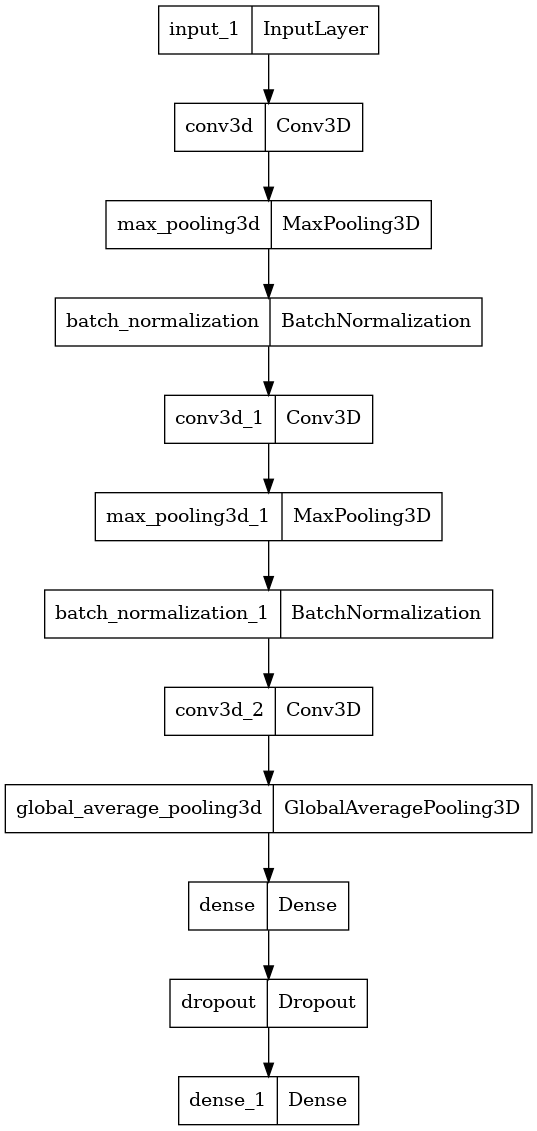

In [14]:
from keras.utils import plot_model
plot_model(model)

In [15]:
Y_train_2=[Y_train[:,0],Y_train[:,1],Y_train[:,2],Y_train[:,3]]
Y_test_2=[Y_test[:,0],Y_test[:,1],Y_test[:,2],Y_test[:,3]]

# Y_train_2=[Y_train[:,1],Y_train[:,2],Y_train[:,3]]
# Y_test_2=[Y_test[:,1],Y_test[:,2],Y_test[:,3]]

# Y_train_2

In [17]:
from keras import backend as K
K.clear_session()
model = get_model(width=61, height=61, depth=15)

# adamopt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# RMSopt = tf.keras.optimizers.RMSprop(learning_rate=0.0007,rho=0.9, epsilon=1e-6)

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Complie the model to choose the loss function, metrics will be just a indicator
model.compile(loss="mae", optimizer='adam', metrics=coeff_determination)

# Save model
# checkpoint_cb = keras.callbacks.ModelCheckpoint(
#     "3d_image_classification.h5", save_best_only=True
# )
# # Early stop strategy
# early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

epochs = 10000
history = model.fit(
    X_train,Y_train_2[1],batch_size=128,validation_data=(X_test,Y_test_2[1]),
    epochs=epochs,
    shuffle=True,
    verbose=2,
#     callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/10000


2023-11-13 21:13:53.743839: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-11-13 21:13:57.213413: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55ad2bdfc820 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-13 21:13:57.213441: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2023-11-13 21:13:57.213446: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): Quadro RTX 5000, Compute Capability 7.5
2023-11-13 21:13:57.213450: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (2): Quadro RTX 5000, Compute Capability 7.5
2023-11-13 21:13:57.223698: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-13 21:13:57.459843: I tensorflow/compiler/jit/xla_compi

2/2 - 9s - loss: 0.3164 - coeff_determination: -5.3225e-01 - val_loss: 0.2935 - val_coeff_determination: -7.1172e-01 - 9s/epoch - 5s/step
Epoch 2/10000
2/2 - 0s - loss: 0.2115 - coeff_determination: 0.1153 - val_loss: 0.2803 - val_coeff_determination: -5.6161e-01 - 163ms/epoch - 82ms/step
Epoch 3/10000
2/2 - 0s - loss: 0.2050 - coeff_determination: -2.3723e-01 - val_loss: 0.2711 - val_coeff_determination: -4.6720e-01 - 159ms/epoch - 80ms/step
Epoch 4/10000
2/2 - 0s - loss: 0.2161 - coeff_determination: -3.4414e-01 - val_loss: 0.2690 - val_coeff_determination: -4.4703e-01 - 162ms/epoch - 81ms/step
Epoch 5/10000
2/2 - 0s - loss: 0.2173 - coeff_determination: -4.5958e-01 - val_loss: 0.2696 - val_coeff_determination: -4.5249e-01 - 295ms/epoch - 147ms/step
Epoch 6/10000
2/2 - 0s - loss: 0.2181 - coeff_determination: -5.2096e-01 - val_loss: 0.2721 - val_coeff_determination: -4.7750e-01 - 378ms/epoch - 189ms/step
Epoch 7/10000
2/2 - 0s - loss: 0.2134 - coeff_determination: -3.1359e-01 - val_l

Epoch 54/10000
2/2 - 0s - loss: 0.1974 - coeff_determination: -2.5249e-02 - val_loss: 0.3399 - val_coeff_determination: -1.2687e+00 - 238ms/epoch - 119ms/step
Epoch 55/10000
2/2 - 0s - loss: 0.1957 - coeff_determination: -3.9813e-04 - val_loss: 0.3386 - val_coeff_determination: -1.2523e+00 - 358ms/epoch - 179ms/step
Epoch 56/10000
2/2 - 0s - loss: 0.1953 - coeff_determination: 0.0271 - val_loss: 0.3432 - val_coeff_determination: -1.3100e+00 - 337ms/epoch - 169ms/step
Epoch 57/10000
2/2 - 0s - loss: 0.1910 - coeff_determination: -8.1146e-02 - val_loss: 0.3489 - val_coeff_determination: -1.3838e+00 - 308ms/epoch - 154ms/step
Epoch 58/10000
2/2 - 0s - loss: 0.1979 - coeff_determination: -2.4683e-01 - val_loss: 0.3507 - val_coeff_determination: -1.4072e+00 - 354ms/epoch - 177ms/step
Epoch 59/10000
2/2 - 0s - loss: 0.1944 - coeff_determination: -2.2445e-01 - val_loss: 0.3562 - val_coeff_determination: -1.4796e+00 - 361ms/epoch - 181ms/step
Epoch 60/10000
2/2 - 0s - loss: 0.1940 - coeff_dete

Epoch 107/10000
2/2 - 0s - loss: 0.1824 - coeff_determination: -4.1914e-02 - val_loss: 0.4194 - val_coeff_determination: -2.4399e+00 - 378ms/epoch - 189ms/step
Epoch 108/10000
2/2 - 0s - loss: 0.1728 - coeff_determination: -4.1421e-02 - val_loss: 0.4685 - val_coeff_determination: -3.3259e+00 - 289ms/epoch - 145ms/step
Epoch 109/10000
2/2 - 0s - loss: 0.1753 - coeff_determination: 0.0320 - val_loss: 0.5359 - val_coeff_determination: -4.6374e+00 - 310ms/epoch - 155ms/step
Epoch 110/10000
2/2 - 0s - loss: 0.1694 - coeff_determination: 0.4156 - val_loss: 0.5924 - val_coeff_determination: -5.8082e+00 - 292ms/epoch - 146ms/step
Epoch 111/10000
2/2 - 0s - loss: 0.1830 - coeff_determination: 0.2928 - val_loss: 0.6214 - val_coeff_determination: -6.4147e+00 - 176ms/epoch - 88ms/step
Epoch 112/10000
2/2 - 0s - loss: 0.1758 - coeff_determination: 0.2314 - val_loss: 0.6261 - val_coeff_determination: -6.5178e+00 - 172ms/epoch - 86ms/step
Epoch 113/10000
2/2 - 0s - loss: 0.1737 - coeff_determination:

Epoch 160/10000
2/2 - 0s - loss: 0.1262 - coeff_determination: -2.9620e-01 - val_loss: 0.7336 - val_coeff_determination: -8.9664e+00 - 263ms/epoch - 131ms/step
Epoch 161/10000
2/2 - 0s - loss: 0.1336 - coeff_determination: -4.0288e-02 - val_loss: 0.7336 - val_coeff_determination: -8.9673e+00 - 375ms/epoch - 188ms/step
Epoch 162/10000
2/2 - 0s - loss: 0.1313 - coeff_determination: 0.5223 - val_loss: 0.7345 - val_coeff_determination: -8.9872e+00 - 278ms/epoch - 139ms/step
Epoch 163/10000
2/2 - 0s - loss: 0.1270 - coeff_determination: 0.4162 - val_loss: 0.7347 - val_coeff_determination: -8.9942e+00 - 174ms/epoch - 87ms/step
Epoch 164/10000
2/2 - 0s - loss: 0.1335 - coeff_determination: -1.0088e+00 - val_loss: 0.7342 - val_coeff_determination: -8.9805e+00 - 171ms/epoch - 86ms/step
Epoch 165/10000
2/2 - 0s - loss: 0.1154 - coeff_determination: 0.6021 - val_loss: 0.7339 - val_coeff_determination: -8.9724e+00 - 170ms/epoch - 85ms/step
Epoch 166/10000
2/2 - 0s - loss: 0.1239 - coeff_determinat

Epoch 213/10000
2/2 - 0s - loss: 0.1217 - coeff_determination: 0.7480 - val_loss: 0.7357 - val_coeff_determination: -9.0175e+00 - 168ms/epoch - 84ms/step
Epoch 214/10000
2/2 - 0s - loss: 0.0917 - coeff_determination: 0.7796 - val_loss: 0.7356 - val_coeff_determination: -9.0157e+00 - 173ms/epoch - 87ms/step
Epoch 215/10000
2/2 - 0s - loss: 0.0880 - coeff_determination: 0.8271 - val_loss: 0.7359 - val_coeff_determination: -9.0216e+00 - 171ms/epoch - 86ms/step
Epoch 216/10000
2/2 - 0s - loss: 0.0874 - coeff_determination: 0.7752 - val_loss: 0.7359 - val_coeff_determination: -9.0225e+00 - 182ms/epoch - 91ms/step
Epoch 217/10000
2/2 - 0s - loss: 0.1057 - coeff_determination: 0.6427 - val_loss: 0.7360 - val_coeff_determination: -9.0243e+00 - 173ms/epoch - 86ms/step
Epoch 218/10000
2/2 - 0s - loss: 0.0955 - coeff_determination: 0.6657 - val_loss: 0.7360 - val_coeff_determination: -9.0247e+00 - 167ms/epoch - 83ms/step
Epoch 219/10000
2/2 - 0s - loss: 0.0806 - coeff_determination: 0.8523 - val_

2/2 - 0s - loss: 0.0598 - coeff_determination: 0.9405 - val_loss: 0.7216 - val_coeff_determination: -8.6741e+00 - 176ms/epoch - 88ms/step
Epoch 267/10000
2/2 - 0s - loss: 0.0636 - coeff_determination: 0.8900 - val_loss: 0.7221 - val_coeff_determination: -8.6861e+00 - 172ms/epoch - 86ms/step
Epoch 268/10000
2/2 - 0s - loss: 0.0584 - coeff_determination: 0.9449 - val_loss: 0.7238 - val_coeff_determination: -8.7266e+00 - 174ms/epoch - 87ms/step
Epoch 269/10000
2/2 - 0s - loss: 0.0602 - coeff_determination: 0.7158 - val_loss: 0.7248 - val_coeff_determination: -8.7523e+00 - 165ms/epoch - 83ms/step
Epoch 270/10000
2/2 - 0s - loss: 0.0664 - coeff_determination: 0.8969 - val_loss: 0.7252 - val_coeff_determination: -8.7611e+00 - 163ms/epoch - 82ms/step
Epoch 271/10000
2/2 - 0s - loss: 0.0715 - coeff_determination: 0.7101 - val_loss: 0.7303 - val_coeff_determination: -8.8851e+00 - 165ms/epoch - 83ms/step
Epoch 272/10000
2/2 - 0s - loss: 0.0558 - coeff_determination: 0.9403 - val_loss: 0.7315 - v

Epoch 320/10000
2/2 - 0s - loss: 0.0729 - coeff_determination: 0.9040 - val_loss: 0.5818 - val_coeff_determination: -5.7873e+00 - 164ms/epoch - 82ms/step
Epoch 321/10000
2/2 - 0s - loss: 0.0624 - coeff_determination: 0.8977 - val_loss: 0.5100 - val_coeff_determination: -4.3391e+00 - 167ms/epoch - 83ms/step
Epoch 322/10000
2/2 - 0s - loss: 0.0623 - coeff_determination: 0.8890 - val_loss: 0.4539 - val_coeff_determination: -3.3153e+00 - 167ms/epoch - 84ms/step
Epoch 323/10000
2/2 - 0s - loss: 0.0496 - coeff_determination: 0.9291 - val_loss: 0.4274 - val_coeff_determination: -2.8739e+00 - 165ms/epoch - 82ms/step
Epoch 324/10000
2/2 - 0s - loss: 0.0547 - coeff_determination: 0.9223 - val_loss: 0.4981 - val_coeff_determination: -4.0902e+00 - 388ms/epoch - 194ms/step
Epoch 325/10000
2/2 - 0s - loss: 0.0515 - coeff_determination: 0.9409 - val_loss: 0.5722 - val_coeff_determination: -5.6047e+00 - 286ms/epoch - 143ms/step
Epoch 326/10000
2/2 - 0s - loss: 0.0622 - coeff_determination: 0.6918 - va

2/2 - 0s - loss: 0.0394 - coeff_determination: 0.9561 - val_loss: 0.2383 - val_coeff_determination: -5.2737e-01 - 169ms/epoch - 85ms/step
Epoch 374/10000
2/2 - 0s - loss: 0.0448 - coeff_determination: 0.9592 - val_loss: 0.2386 - val_coeff_determination: -5.4373e-01 - 259ms/epoch - 129ms/step
Epoch 375/10000
2/2 - 0s - loss: 0.0404 - coeff_determination: 0.8862 - val_loss: 0.2279 - val_coeff_determination: -4.9294e-01 - 295ms/epoch - 147ms/step
Epoch 376/10000
2/2 - 0s - loss: 0.0440 - coeff_determination: 0.9120 - val_loss: 0.2241 - val_coeff_determination: -4.5900e-01 - 323ms/epoch - 161ms/step
Epoch 377/10000
2/2 - 0s - loss: 0.0428 - coeff_determination: 0.9577 - val_loss: 0.2262 - val_coeff_determination: -4.4996e-01 - 326ms/epoch - 163ms/step
Epoch 378/10000
2/2 - 0s - loss: 0.0408 - coeff_determination: 0.7609 - val_loss: 0.2274 - val_coeff_determination: -4.8894e-01 - 298ms/epoch - 149ms/step
Epoch 379/10000
2/2 - 0s - loss: 0.0394 - coeff_determination: 0.8790 - val_loss: 0.236

2/2 - 0s - loss: 0.0391 - coeff_determination: 0.9650 - val_loss: 0.2658 - val_coeff_determination: -7.4077e-01 - 290ms/epoch - 145ms/step
Epoch 427/10000
2/2 - 0s - loss: 0.0432 - coeff_determination: 0.9209 - val_loss: 0.2579 - val_coeff_determination: -6.4608e-01 - 352ms/epoch - 176ms/step
Epoch 428/10000
2/2 - 0s - loss: 0.0420 - coeff_determination: 0.9631 - val_loss: 0.2441 - val_coeff_determination: -4.7398e-01 - 363ms/epoch - 182ms/step
Epoch 429/10000
2/2 - 0s - loss: 0.0343 - coeff_determination: 0.9775 - val_loss: 0.2380 - val_coeff_determination: -4.2031e-01 - 230ms/epoch - 115ms/step
Epoch 430/10000
2/2 - 0s - loss: 0.0377 - coeff_determination: 0.9713 - val_loss: 0.2349 - val_coeff_determination: -4.2213e-01 - 167ms/epoch - 84ms/step
Epoch 431/10000
2/2 - 0s - loss: 0.0350 - coeff_determination: 0.9740 - val_loss: 0.2377 - val_coeff_determination: -4.5253e-01 - 171ms/epoch - 85ms/step
Epoch 432/10000
2/2 - 0s - loss: 0.0345 - coeff_determination: 0.9230 - val_loss: 0.2415

Epoch 480/10000
2/2 - 0s - loss: 0.0461 - coeff_determination: 0.8809 - val_loss: 0.2679 - val_coeff_determination: -8.8519e-01 - 299ms/epoch - 150ms/step
Epoch 481/10000
2/2 - 0s - loss: 0.0403 - coeff_determination: 0.9390 - val_loss: 0.2750 - val_coeff_determination: -9.7966e-01 - 171ms/epoch - 85ms/step
Epoch 482/10000
2/2 - 0s - loss: 0.0421 - coeff_determination: 0.9449 - val_loss: 0.2884 - val_coeff_determination: -1.1151e+00 - 172ms/epoch - 86ms/step
Epoch 483/10000
2/2 - 0s - loss: 0.0403 - coeff_determination: 0.9374 - val_loss: 0.2847 - val_coeff_determination: -1.0730e+00 - 172ms/epoch - 86ms/step
Epoch 484/10000
2/2 - 0s - loss: 0.0385 - coeff_determination: 0.9713 - val_loss: 0.2879 - val_coeff_determination: -1.0353e+00 - 174ms/epoch - 87ms/step
Epoch 485/10000
2/2 - 0s - loss: 0.0357 - coeff_determination: 0.9747 - val_loss: 0.3104 - val_coeff_determination: -1.1778e+00 - 163ms/epoch - 82ms/step
Epoch 486/10000
2/2 - 0s - loss: 0.0399 - coeff_determination: 0.9507 - val

2/2 - 0s - loss: 0.0463 - coeff_determination: 0.9351 - val_loss: 0.2586 - val_coeff_determination: -6.8645e-01 - 172ms/epoch - 86ms/step
Epoch 534/10000
2/2 - 0s - loss: 0.0499 - coeff_determination: 0.9526 - val_loss: 0.2610 - val_coeff_determination: -6.9787e-01 - 173ms/epoch - 86ms/step
Epoch 535/10000
2/2 - 0s - loss: 0.0450 - coeff_determination: 0.9571 - val_loss: 0.2766 - val_coeff_determination: -8.8459e-01 - 172ms/epoch - 86ms/step
Epoch 536/10000
2/2 - 0s - loss: 0.0398 - coeff_determination: 0.9698 - val_loss: 0.3267 - val_coeff_determination: -1.5424e+00 - 166ms/epoch - 83ms/step
Epoch 537/10000
2/2 - 0s - loss: 0.0471 - coeff_determination: 0.9654 - val_loss: 0.4021 - val_coeff_determination: -2.7241e+00 - 165ms/epoch - 82ms/step
Epoch 538/10000
2/2 - 0s - loss: 0.0396 - coeff_determination: 0.8916 - val_loss: 0.4646 - val_coeff_determination: -3.8067e+00 - 164ms/epoch - 82ms/step
Epoch 539/10000
2/2 - 0s - loss: 0.0377 - coeff_determination: 0.9670 - val_loss: 0.5295 - v

Epoch 587/10000
2/2 - 0s - loss: 0.0370 - coeff_determination: 0.9767 - val_loss: 0.2339 - val_coeff_determination: -5.8704e-01 - 166ms/epoch - 83ms/step
Epoch 588/10000
2/2 - 0s - loss: 0.0369 - coeff_determination: 0.9112 - val_loss: 0.2282 - val_coeff_determination: -5.9987e-01 - 162ms/epoch - 81ms/step
Epoch 589/10000
2/2 - 0s - loss: 0.0372 - coeff_determination: 0.9537 - val_loss: 0.2259 - val_coeff_determination: -6.0509e-01 - 165ms/epoch - 82ms/step
Epoch 590/10000
2/2 - 0s - loss: 0.0322 - coeff_determination: 0.9621 - val_loss: 0.2253 - val_coeff_determination: -5.8261e-01 - 394ms/epoch - 197ms/step
Epoch 591/10000
2/2 - 0s - loss: 0.0383 - coeff_determination: 0.9544 - val_loss: 0.2269 - val_coeff_determination: -5.9267e-01 - 271ms/epoch - 136ms/step
Epoch 592/10000
2/2 - 0s - loss: 0.0299 - coeff_determination: 0.9794 - val_loss: 0.2280 - val_coeff_determination: -6.5019e-01 - 295ms/epoch - 147ms/step
Epoch 593/10000
2/2 - 0s - loss: 0.0308 - coeff_determination: 0.9771 - v

2/2 - 0s - loss: 0.0376 - coeff_determination: 0.9698 - val_loss: 0.2280 - val_coeff_determination: -5.4736e-01 - 314ms/epoch - 157ms/step
Epoch 641/10000
2/2 - 0s - loss: 0.0343 - coeff_determination: 0.9694 - val_loss: 0.2258 - val_coeff_determination: -5.1029e-01 - 310ms/epoch - 155ms/step
Epoch 642/10000
2/2 - 0s - loss: 0.0413 - coeff_determination: 0.8494 - val_loss: 0.2256 - val_coeff_determination: -4.7952e-01 - 213ms/epoch - 107ms/step
Epoch 643/10000
2/2 - 0s - loss: 0.0384 - coeff_determination: 0.9555 - val_loss: 0.2298 - val_coeff_determination: -4.5959e-01 - 360ms/epoch - 180ms/step
Epoch 644/10000
2/2 - 0s - loss: 0.0341 - coeff_determination: 0.9077 - val_loss: 0.2459 - val_coeff_determination: -5.1917e-01 - 326ms/epoch - 163ms/step
Epoch 645/10000
2/2 - 0s - loss: 0.0412 - coeff_determination: 0.8750 - val_loss: 0.2512 - val_coeff_determination: -6.0398e-01 - 165ms/epoch - 82ms/step
Epoch 646/10000
2/2 - 0s - loss: 0.0298 - coeff_determination: 0.9711 - val_loss: 0.245

Epoch 694/10000
2/2 - 0s - loss: 0.0349 - coeff_determination: 0.9769 - val_loss: 0.2993 - val_coeff_determination: -1.5640e+00 - 364ms/epoch - 182ms/step
Epoch 695/10000
2/2 - 0s - loss: 0.0385 - coeff_determination: 0.9659 - val_loss: 0.2936 - val_coeff_determination: -1.5128e+00 - 280ms/epoch - 140ms/step
Epoch 696/10000
2/2 - 0s - loss: 0.0338 - coeff_determination: 0.9758 - val_loss: 0.3012 - val_coeff_determination: -1.6110e+00 - 198ms/epoch - 99ms/step
Epoch 697/10000
2/2 - 0s - loss: 0.0317 - coeff_determination: 0.9721 - val_loss: 0.3054 - val_coeff_determination: -1.6515e+00 - 213ms/epoch - 106ms/step
Epoch 698/10000
2/2 - 0s - loss: 0.0400 - coeff_determination: 0.9726 - val_loss: 0.2901 - val_coeff_determination: -1.4908e+00 - 207ms/epoch - 104ms/step
Epoch 699/10000
2/2 - 0s - loss: 0.0336 - coeff_determination: 0.9405 - val_loss: 0.2791 - val_coeff_determination: -1.3220e+00 - 178ms/epoch - 89ms/step
Epoch 700/10000
2/2 - 0s - loss: 0.0353 - coeff_determination: 0.9789 - 

2/2 - 0s - loss: 0.0440 - coeff_determination: 0.9671 - val_loss: 0.2715 - val_coeff_determination: -7.9802e-01 - 174ms/epoch - 87ms/step
Epoch 748/10000
2/2 - 0s - loss: 0.0326 - coeff_determination: 0.9748 - val_loss: 0.2808 - val_coeff_determination: -8.7768e-01 - 176ms/epoch - 88ms/step
Epoch 749/10000
2/2 - 0s - loss: 0.0383 - coeff_determination: 0.9693 - val_loss: 0.2774 - val_coeff_determination: -9.1053e-01 - 171ms/epoch - 86ms/step
Epoch 750/10000
2/2 - 0s - loss: 0.0374 - coeff_determination: 0.9746 - val_loss: 0.2688 - val_coeff_determination: -8.8968e-01 - 172ms/epoch - 86ms/step
Epoch 751/10000
2/2 - 0s - loss: 0.0293 - coeff_determination: 0.9789 - val_loss: 0.2571 - val_coeff_determination: -7.9561e-01 - 162ms/epoch - 81ms/step
Epoch 752/10000
2/2 - 0s - loss: 0.0335 - coeff_determination: 0.9693 - val_loss: 0.2544 - val_coeff_determination: -7.5346e-01 - 164ms/epoch - 82ms/step
Epoch 753/10000
2/2 - 0s - loss: 0.0302 - coeff_determination: 0.9759 - val_loss: 0.2568 - v

Epoch 801/10000
2/2 - 0s - loss: 0.0367 - coeff_determination: 0.9658 - val_loss: 0.2560 - val_coeff_determination: -5.3219e-01 - 170ms/epoch - 85ms/step
Epoch 802/10000
2/2 - 0s - loss: 0.0312 - coeff_determination: 0.9818 - val_loss: 0.2595 - val_coeff_determination: -5.5842e-01 - 166ms/epoch - 83ms/step
Epoch 803/10000
2/2 - 0s - loss: 0.0334 - coeff_determination: 0.9252 - val_loss: 0.2479 - val_coeff_determination: -5.0002e-01 - 162ms/epoch - 81ms/step
Epoch 804/10000
2/2 - 0s - loss: 0.0287 - coeff_determination: 0.9675 - val_loss: 0.2362 - val_coeff_determination: -4.6231e-01 - 166ms/epoch - 83ms/step
Epoch 805/10000
2/2 - 0s - loss: 0.0314 - coeff_determination: 0.9719 - val_loss: 0.2344 - val_coeff_determination: -4.5729e-01 - 163ms/epoch - 82ms/step
Epoch 806/10000
2/2 - 0s - loss: 0.0322 - coeff_determination: 0.9817 - val_loss: 0.2363 - val_coeff_determination: -4.7405e-01 - 360ms/epoch - 180ms/step
Epoch 807/10000
2/2 - 0s - loss: 0.0292 - coeff_determination: 0.9853 - val

2/2 - 0s - loss: 0.0331 - coeff_determination: 0.9288 - val_loss: 0.2407 - val_coeff_determination: -6.5433e-01 - 161ms/epoch - 81ms/step
Epoch 855/10000
2/2 - 0s - loss: 0.0311 - coeff_determination: 0.9699 - val_loss: 0.2350 - val_coeff_determination: -6.5042e-01 - 162ms/epoch - 81ms/step
Epoch 856/10000
2/2 - 0s - loss: 0.0359 - coeff_determination: 0.9534 - val_loss: 0.2349 - val_coeff_determination: -6.4474e-01 - 241ms/epoch - 121ms/step
Epoch 857/10000
2/2 - 0s - loss: 0.0317 - coeff_determination: 0.9615 - val_loss: 0.2410 - val_coeff_determination: -6.3528e-01 - 300ms/epoch - 150ms/step
Epoch 858/10000
2/2 - 0s - loss: 0.0360 - coeff_determination: 0.9294 - val_loss: 0.2416 - val_coeff_determination: -6.1735e-01 - 289ms/epoch - 145ms/step
Epoch 859/10000
2/2 - 0s - loss: 0.0369 - coeff_determination: 0.9766 - val_loss: 0.2359 - val_coeff_determination: -5.8706e-01 - 317ms/epoch - 159ms/step
Epoch 860/10000
2/2 - 0s - loss: 0.0323 - coeff_determination: 0.9736 - val_loss: 0.2332

Epoch 908/10000
2/2 - 0s - loss: 0.0348 - coeff_determination: 0.9752 - val_loss: 0.2492 - val_coeff_determination: -6.6012e-01 - 355ms/epoch - 177ms/step
Epoch 909/10000
2/2 - 0s - loss: 0.0354 - coeff_determination: 0.9645 - val_loss: 0.2551 - val_coeff_determination: -6.7162e-01 - 303ms/epoch - 152ms/step
Epoch 910/10000
2/2 - 0s - loss: 0.0413 - coeff_determination: 0.9344 - val_loss: 0.2499 - val_coeff_determination: -5.9151e-01 - 257ms/epoch - 128ms/step
Epoch 911/10000
2/2 - 0s - loss: 0.0371 - coeff_determination: 0.9630 - val_loss: 0.2382 - val_coeff_determination: -4.9723e-01 - 168ms/epoch - 84ms/step
Epoch 912/10000
2/2 - 0s - loss: 0.0307 - coeff_determination: 0.9754 - val_loss: 0.2337 - val_coeff_determination: -4.5936e-01 - 171ms/epoch - 86ms/step
Epoch 913/10000
2/2 - 0s - loss: 0.0327 - coeff_determination: 0.9670 - val_loss: 0.2378 - val_coeff_determination: -4.4853e-01 - 171ms/epoch - 85ms/step
Epoch 914/10000
2/2 - 0s - loss: 0.0262 - coeff_determination: 0.9854 - v

2/2 - 0s - loss: 0.0460 - coeff_determination: 0.9630 - val_loss: 0.2464 - val_coeff_determination: -7.6928e-01 - 173ms/epoch - 86ms/step
Epoch 962/10000
2/2 - 0s - loss: 0.0383 - coeff_determination: 0.8098 - val_loss: 0.2524 - val_coeff_determination: -7.9582e-01 - 173ms/epoch - 86ms/step
Epoch 963/10000
2/2 - 0s - loss: 0.0301 - coeff_determination: 0.8099 - val_loss: 0.2574 - val_coeff_determination: -8.1642e-01 - 173ms/epoch - 87ms/step
Epoch 964/10000
2/2 - 0s - loss: 0.0361 - coeff_determination: 0.9622 - val_loss: 0.2457 - val_coeff_determination: -6.7896e-01 - 172ms/epoch - 86ms/step
Epoch 965/10000
2/2 - 0s - loss: 0.0338 - coeff_determination: 0.9767 - val_loss: 0.2296 - val_coeff_determination: -5.7225e-01 - 169ms/epoch - 85ms/step
Epoch 966/10000
2/2 - 0s - loss: 0.0312 - coeff_determination: 0.9596 - val_loss: 0.2237 - val_coeff_determination: -5.7235e-01 - 169ms/epoch - 84ms/step
Epoch 967/10000
2/2 - 0s - loss: 0.0445 - coeff_determination: 0.9569 - val_loss: 0.2234 - v

2/2 - 0s - loss: 0.0321 - coeff_determination: 0.9724 - val_loss: 0.2542 - val_coeff_determination: -6.3899e-01 - 173ms/epoch - 87ms/step
Epoch 1015/10000
2/2 - 0s - loss: 0.0413 - coeff_determination: 0.9537 - val_loss: 0.2518 - val_coeff_determination: -6.6406e-01 - 165ms/epoch - 82ms/step
Epoch 1016/10000
2/2 - 0s - loss: 0.0347 - coeff_determination: 0.9795 - val_loss: 0.2443 - val_coeff_determination: -6.8267e-01 - 211ms/epoch - 105ms/step
Epoch 1017/10000
2/2 - 0s - loss: 0.0339 - coeff_determination: 0.9176 - val_loss: 0.2426 - val_coeff_determination: -7.1838e-01 - 307ms/epoch - 153ms/step
Epoch 1018/10000
2/2 - 0s - loss: 0.0330 - coeff_determination: 0.9817 - val_loss: 0.2464 - val_coeff_determination: -7.5773e-01 - 368ms/epoch - 184ms/step
Epoch 1019/10000
2/2 - 0s - loss: 0.0356 - coeff_determination: 0.9788 - val_loss: 0.2506 - val_coeff_determination: -7.9776e-01 - 252ms/epoch - 126ms/step
Epoch 1020/10000
2/2 - 0s - loss: 0.0331 - coeff_determination: 0.9470 - val_loss: 

KeyboardInterrupt: 

In [401]:
def plot_history(history, 
                fig_size_width=10, 
                fig_size_height=7,
                val=True):
    
    plt.figure(figsize=(fig_size_width, fig_size_height))
    acc = history.history['coeff_determination']
    loss = history.history['loss']
    epochs = range(len(acc))
    if val==True:
        val_acc = history.history['val_coeff_determination']
        val_loss = history.history['val_loss']
        plt.plot(epochs, val_acc, color = "green", linestyle = "solid", label= 'valid acc')
        plt.plot(epochs, val_loss, color = "orange", linestyle = "solid" , label= 'valid loss')
   

    # グラフ表示

    # plot accuracy values
    plt.plot(epochs, acc, color = "blue", linestyle = "solid", label = 'train acc')
 
    # plot loss values
    #plt.subplot(122)
    plt.plot(epochs, loss, color = "red", linestyle = "solid" ,label = 'train loss')
    #plt.title('Training and Validation loss')
    plt.legend()
    plt.xlabel('epochs')
    plt.grid()

#     plt.savefig(save_graph_img_path)
#     plt.close() # バッファ解放

In [ ]:
plot_history(history)

2/2 [==============================] - 0s 11ms/step


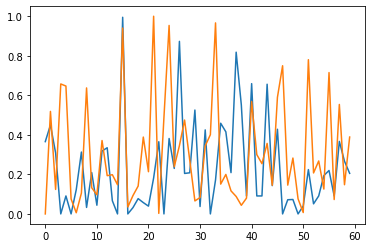

In [374]:
plt.plot(Y_test_2[0])
plt.plot(min_max(model.predict(X_test)))


In [373]:
for i,z in zip(model.predict(X_test), model.predict(X_train)):
    print(i, z)

5/5 [==============================] - 0s 15ms/step
[0.00199036] [0.81850106]
[0.18370706] [0.05940153]
[0.04541061] [0.08784512]
[0.23239887] [0.02884824]
[0.22866404] [0.02597046]
[0.02852942] [0.02167851]
[0.00405806] [0.04461269]
[0.03892106] [0.02366028]
[0.22533998] [0.68250674]
[0.04831824] [0.19770336]
[0.03587928] [0.01309643]
[0.13206516] [0.06950303]
[0.06979391] [0.08012956]
[0.07150735] [0.44399872]
[0.05373289] [0.10176098]
[0.3314633] [0.01160719]
[0.01430279] [0.36410797]
[0.03460369] [0.15148215]
[0.05137504] [0.07039092]
[0.13822377] [0.39771235]
[0.0768237] [0.00364906]
[0.35242566] [0.7068236]
[0.00293515] [0.01372503]
[0.17321476] [0.00805571]
[0.33608317] [0.0260242]
[0.08566947] [0.34119177]
[0.12300187] [0.03544275]
[0.16838658] [0.7602948]
[0.09735459] [0.28599802]
[0.02502008] [0.03027482]
[0.03103501] [0.02352183]
[0.12244374] [0.63327175]
[0.14247197] [0.06640321]
[0.34062558] [0.10859437]
[0.05485182] [0.039797]
[0.07197056] [0.02316304]
[0.04283075] [0.076

5/5 [==============================] - 0s 11ms/step


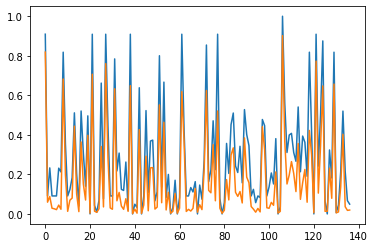

In [372]:
plt.plot(Y_train_2[0])
plt.plot(model.predict(X_train))

In [203]:
def min_max(l):
    l_min = min(l)
    l_max = max(l)
    return [(i - l_min) / (l_max - l_min) for i in l]
min_max(model.predict(X_test)[0])

2/2 [==============================] - 0s 11ms/step


[array([0.01992902], dtype=float32),
 array([0.61670583], dtype=float32),
 array([0.6788884], dtype=float32),
 array([0.04965469], dtype=float32),
 array([0.], dtype=float32),
 array([0.10561364], dtype=float32),
 array([1.], dtype=float32),
 array([0.24553016], dtype=float32),
 array([0.3902931], dtype=float32),
 array([0.46603888], dtype=float32),
 array([0.35392845], dtype=float32),
 array([0.17012613], dtype=float32),
 array([0.29036266], dtype=float32),
 array([0.7371984], dtype=float32),
 array([0.01072116], dtype=float32),
 array([0.08975672], dtype=float32),
 array([0.18279916], dtype=float32),
 array([0.12703681], dtype=float32),
 array([0.4763699], dtype=float32),
 array([0.39111677], dtype=float32),
 array([0.55942816], dtype=float32),
 array([0.0796435], dtype=float32),
 array([0.38038856], dtype=float32),
 array([0.3232087], dtype=float32),
 array([0.4983425], dtype=float32),
 array([0.24627925], dtype=float32),
 array([0.27528206], dtype=float32),
 array([0.34674504], dty

In [2]:
# Using CPU only for Tensorflow

import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "1"


In [6]:
# Test code to check if tensorflow is working

import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
print ("-----------------------------------")
print (" TensorFlow version is ", tf.__version__)
print ("-----------------------------------")
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)), tf.keras.layers.Dense(128, activation='relu'), tf.keras.layers.Dropout(0.2), tf.keras.layers.Dense(10)])
predictions = model(x_train[:1]).numpy()
tf.nn.softmax(predictions).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
print ("-----------------------------------")
print ("*Train model")
model.fit(x_train, y_train, epochs=5)
print ("-----------------------------------")
print ("*Evaluate model")
model.evaluate(x_test, y_test, verbose=2)

2023-11-13 09:27:12.956141: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 09:27:13.645167: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-13 09:27:15.364684: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-11-13 09:27:15.364939: W tensorflow/

-----------------------------------
 TensorFlow version is  2.11.0
-----------------------------------


2023-11-13 09:27:17.301515: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 09:27:19.363843: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14773 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:19:00.0, compute capability: 7.5
2023-11-13 09:27:19.367000: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14773 MB memory:  -> device: 1, name: Quadro RTX 5000, pci bus id: 0000:1a:00.0, compute capability: 7.5
2023-11-13 09:27:19.368020: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/tas

-----------------------------------
*Train model
Epoch 1/5


2023-11-13 09:27:21.715617: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55c5182d7860 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-13 09:27:21.715650: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2023-11-13 09:27:21.715657: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): Quadro RTX 5000, Compute Capability 7.5
2023-11-13 09:27:21.715662: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (2): Quadro RTX 5000, Compute Capability 7.5
2023-11-13 09:27:21.806032: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-13 09:27:22.395632: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 7s 3ms/step - loss: 0.2924 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1421 - accuracy: 0.9584
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1098 - accuracy: 0.9665
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0882 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0752 - accuracy: 0.9766
-----------------------------------
*Evaluate model
313/313 - 1s - loss: 0.0728 - accuracy: 0.9778 - 765ms/epoch - 2ms/step


[0.07276802510023117, 0.9778000116348267]

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()